# EDA 1 | Parte 3.2 - Análise dos Textos dos Hinos da ICM
Este notebook explora o conteúdo textual dos hinos da coletânea principal da Igreja Cristã Maranata.

O objetivo é analisar o texto dos louvores, extraindo informações como número de palavras, tokens, frequências, n-grams e similaridade entre hinos.

---
**Conteúdo do notebook:**
- Carregamento dos dados tratados
- Extração de n-grams (bigramas, trigramas)
- Cálculo de similaridade entre hinos (CountVectorizer e TF-IDF)

---

**A seguir:** Importação e preparação da lista de stopwords, combinando fontes externas e do NLTK para uso na tokenização.

In [1]:
import pandas as pd
from pathlib import Path

assets_folder = Path("../assets")
hinos_analise: pd.DataFrame = pd.read_pickle(assets_folder / "hinos_analise_tokens.pkl")
hinos_analise.head()

,nome,texto,texto_limpo,categoria_id,categoria,categoria_abr,tokens,tokens_no_stops,num_tokens
numero,,,,,,,,,
0,AQUILO QUE FUI NÃO SOU MAIS,"AQUILO QUE FUI NÃO SOU MAIS,\nNEM SOU TUDO O Q...","AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QU...",1,CLAMOR,CLAMOR,"[aquilo, que, fui, não, sou, mais, nem, sou, t...","[tudo, devo, graça, vê, certo, vou, glória, cr...",124
1,O SANGUE DE JESUS TEM PODER,"O SANGUE DE JESUS TEM PODER,\nPODER QUE A MIM ...","O SANGUE DE JESUS TEM PODER, PODER QUE A MIM P...",1,CLAMOR,CLAMOR,"[o, sangue, de, jesus, tem, poder, poder, que,...","[sangue, jesus, pode, valer, comunhão, posso, ...",110
2,O SANGUE DE JESUS TEM PODER PARA SALVAR,O SANGUE DE JESUS TEM PODER (2x)\nO SANGUE DE ...,"O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS,...",1,CLAMOR,CLAMOR,"[o, sangue, de, jesus, tem, poder, o, sangue, ...","[sangue, jesus, sangue, jesus, sangue, jesus, ...",50
3,CLAMO A TI,"CLAMO A TI, Ó MEU SENHOR,\nCLAMO A TI, MEU SAL...","CLAMO A TI, Ó MEU SENHOR, CLAMO A TI, MEU SALV...",1,CLAMOR,CLAMOR,"[clamo, a, ti, ó, meu, senhor, clamo, a, ti, m...","[clamo, senhor, clamo, salvador, sangue, vida,...",41
4,QUANDO TE PROSTRARES,"QUANDO TE PROSTRARES DIANTE DE DEUS,\nLEMBRA Q...","QUANDO TE PROSTRARES DIANTE DE DEUS, LEMBRA QU...",1,CLAMOR,CLAMOR,"[quando, te, prostrares, diante, de, deus, lem...","[prostrares, diante, deus, lembra, jesus, pede...",52


## N-grams

---

**A seguir:** Extração e análise de n-grams (bigramas e trigramas) para identificar padrões de palavras recorrentes nos textos dos hinos.

In [2]:
from collections import Counter
import nltk


# Exemplo: gerar bigramas do corpus inteiro
def get_bigrams(tokens):
    return list(nltk.ngrams(tokens, 2))  # 2 = bigramas


# Gerar bigramas para todos os hinos
hinos_analise["bigrams"] = hinos_analise["tokens_no_stops"].apply(get_bigrams)

# Contar bigramas mais frequentes no corpus inteiro
all_bigrams = [bigram for hino in hinos_analise["bigrams"] for bigram in hino]
bigram_freq = Counter(all_bigrams)

bigram_freq.most_common(10)

[(('glória', 'glória'), 110),
 (('santo', 'santo'), 79),
 (('grande', 'amor'), 73),
 (('vem', 'jesus'), 70),
 (('sangue', 'jesus'), 69),
 (('senhor', 'jesus'), 69),
 (('jesus', 'cristo'), 67),
 (('vem', 'vem'), 63),
 (('amor', 'deus'), 55),
 (('jesus', 'senhor'), 53)]

In [3]:
# Gerar trigramas do corpus inteiro
def get_trigrams(tokens):
    return list(nltk.ngrams(tokens, 3))  # 3 = trigrams


# Gerar trigrams para todos os hinos
hinos_analise["trigrams"] = hinos_analise["tokens_no_stops"].apply(get_trigrams)

# Contar trigrams mais frequentes no corpus inteiro
all_trigrams = [trigram for hino in hinos_analise["trigrams"] for trigram in hino]
trigram_freq = Counter(all_trigrams)

trigram_freq.most_common(10)

[(('santo', 'santo', 'santo'), 50),
 (('glória', 'glória', 'glória'), 49),
 (('vem', 'senhor', 'jesus'), 20),
 (('leão', 'tribo', 'judá'), 18),
 (('vai', 'hoje', 'passar'), 18),
 (('glória', 'glória', 'aleluia'), 18),
 (('maranata', 'ora', 'vem'), 17),
 (('ora', 'vem', 'senhor'), 16),
 (('aleluia', 'aleluia', 'aleluia'), 14),
 (('vem', 'vem', 'vem'), 14)]

## Matriz de frequência e similaridade CountVectorizer

---

**A seguir:** Cálculo de matriz de similaridade entre hinos usando CountVectorizer, visualização com heatmap e identificação de hinos similares por esse método.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Juntar os tokens em strings
hinos_analise["tokens_str"] = hinos_analise["tokens_no_stops"].apply(
    lambda t: " ".join(t)
)

# Criar o vetor de frequências
vectorizer = CountVectorizer(
    ngram_range=(1, 3), stop_words=None
)  # unigramas, bigramas e trigramas
X = vectorizer.fit_transform(hinos_analise["tokens_str"])

# Similaridade de cosseno entre hinos
similarity = cosine_similarity(X)
similarity_df = pd.DataFrame(
    similarity, index=hinos_analise.index, columns=hinos_analise.index
)

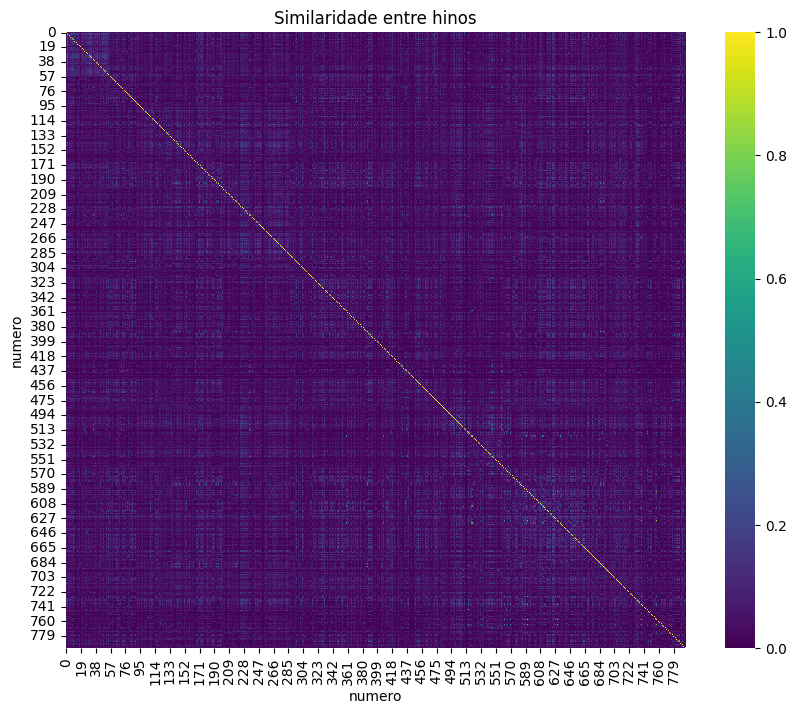

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="viridis", annot=False)
plt.title("Similaridade entre hinos")
plt.show()

In [8]:
high_similarity = similarity_df[
    (similarity_df > 0.5) & (similarity_df < 1.0)
].stack()  # .reset_index()
high_similarity = high_similarity[
    high_similarity.index.get_level_values(0)
    < high_similarity.index.get_level_values(1)
]
high_similarity.sort_values(ascending=False).head()

numero  numero
630     757       0.851155
592     757       0.842601
        630       0.834208
521     632       0.805105
757     764       0.787439
dtype: float64

## Matriz com TF-IDF

**A seguir:** Cálculo de matriz de similaridade entre hinos usando TF-IDF, visualização com heatmap e identificação de hinos similares por esse método.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF: unigrams e bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words=None)
X_tfidf = vectorizer.fit_transform(hinos_analise["tokens_str"])

**A seguir:** Ranking de termos mais relevantes por hino com TF-IDF, destacando palavras-chave que caracterizam cada hino individualmente (uni e bigramas).

In [10]:
import random


def top_terms_for_hymn(row, features, top_n=5):
    row_data = list(zip(features, row))
    row_data = sorted(row_data, key=lambda x: x[1], reverse=True)
    return row_data[:top_n]


features = vectorizer.get_feature_names_out()

# random.seed(42)
sample_idxs = random.sample(range(X_tfidf.shape[0]), 3)

for idx in sample_idxs:
    row = X_tfidf[idx].toarray().ravel()
    top_terms = top_terms_for_hymn(row, features, top_n=3)
    hymn_num = hinos_analise.index[idx]
    hymn_name = hinos_analise.loc[hymn_num, "nome"]
    print(f"\n🎵 Hino {hymn_num} — {hymn_name}:")
    for term, score in top_terms:
        print(f"  {term}: {score:.3f}")


🎵 Hino 415 — QUERO SER UM VASO DE BÊNÇÃO:
  vaso: 0.464
  vaso bênção: 0.368
  bênção: 0.270

🎵 Hino 339 — PARA OS MONTES OLHAREI:
  senhor guarda: 0.385
  guarda: 0.291
  agora final: 0.193

🎵 Hino 19 — TEU POVO CLAMA:
  povo clama: 0.487
  clama: 0.391
  povo: 0.257


**A seguir:** Construindo a matriz de similaridade entre hinos usando TF-IDF

In [11]:
similarity_tfidf = cosine_similarity(X_tfidf)
similarity_df_tfidf = pd.DataFrame(
    similarity_tfidf, index=hinos_analise.index, columns=hinos_analise.index
)

**A seguir:** Visualização com heatmap e identificação de hinos similares por esse método.

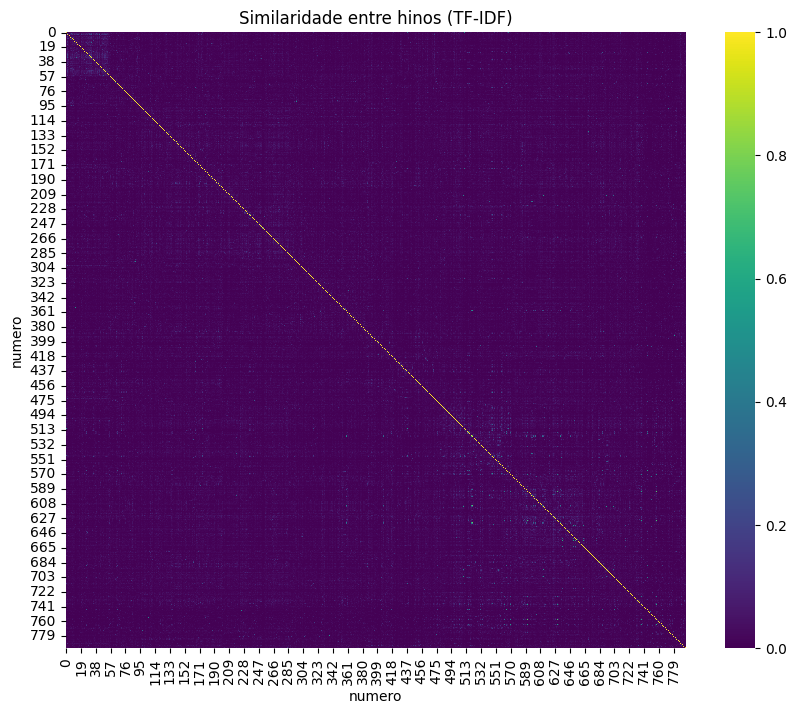

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df_tfidf, cmap="viridis", annot=False)
plt.title("Similaridade entre hinos (TF-IDF)")
plt.show()

In [13]:
high_similarity_tfidf = similarity_df_tfidf[
    (similarity_df_tfidf > 0.5) & (similarity_df_tfidf < 1.0)
].stack()  # .reset_index()
high_similarity_tfidf = high_similarity_tfidf[
    high_similarity_tfidf.index.get_level_values(0)
    < high_similarity_tfidf.index.get_level_values(1)
]
high_similarity_tfidf.sort_values(ascending=False).head(10)

numero  numero
521     632       0.763621
        610       0.739123
592     757       0.731644
630     757       0.705738
592     630       0.689809
610     632       0.634740
653     655       0.629616
757     764       0.621755
738     757       0.620061
636     655       0.603855
dtype: float64

---

**A seguir:** Exportação dos dados tratados e enriquecidos para arquivo pickle, permitindo reutilização em outras análises ou notebooks.

In [14]:
hinos_analise.to_pickle(assets_folder / "hinos_analise_tokens_ngrams.pkl")